In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Необходимо изучить, как люди пользуются развлекательным приложением, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей. 
    Нужно выяснить:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?
- Проанализировать общую окупаемость рекламы;
- Проанализировать окупаемость рекламы с разбивкой по устройствам;
- Проанализировать окупаемость рекламы с разбивкой по странам;
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам.
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.  
- Выделить причины неэффективности привлечения пользователей;
- Сформировать рекомендации для отдела маркетинга для повышения эффективности.</div>

# 1. Загрузим данные и подготовим их к анализу
Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный.

In [ ]:
# импортирую библиотеки
import math as mh                        # math для математических операций
import pandas as pd                      # pandas для работы с датафреймами
import numpy as np                       # numpy 
import matplotlib.pyplot as plt          # matplotlib для построения графиков
from scipy import stats as st            # stats для проведения статистического анализа
import seaborn as sns                    # seaborn для визуализации
from datetime import datetime, timedelta # datetime для работы с датай и временем


In [ ]:
# прочитаем датасеты и сохраним их в переменных, конструкцию "try- except" используем для работоспособности блокнота на разных устройствах
try:
  visits, orders, costs = (                         # сохранение датасетов для блокнота в Практикуме
    pd.read_csv(),
    pd.read_csv(),
    pd.read_csv())
except:
  visits, orders, costs = (                         # сохранение датасетов для блокнота при локальной работе
    pd.read_csv(),
    pd.read_csv(),
    pd.read_csv())



In [ ]:
# циклом перебираем датасеты
data = [visits, orders, costs]
for i in data:
    i.columns = [x.lower().replace(' ', '_') for x in i.columns.values] # приведем названия столбцов к нижнему змеиному регистру
    print(f'Количество дубликатов: {i.duplicated().sum()}')             # проверим количество дубликатов
    print()
    display(i.head(2))                                                  # выведем на экран первые две строки датасета
    print()
    display(i.info())                                                   # выведем информацию о датасетах
    print('Количество пропусков по столбцам')
    print(round((i.isna().mean()*100),2))
    print('-----------------');

Количество дубликатов: 0



,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Количество пропусков по столбцам
user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64
-----------------
Количество дубликатов: 0



,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Количество пропусков по столбцам
user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64
-----------------
Количество дубликатов: 0



,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Количество пропусков по столбцам
dt         0.0
channel    0.0
costs      0.0
dtype: float64
-----------------


In [ ]:
# данные в столбцах 'session_start', 'session_end', 'event_dt', 'dt' датасетов visits, orders и costs приведем к формату datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date



В распоряжении имеем три датасета с информацией о визитах, заказах и расходах, их сохранили в переменных visits, orders и costs соответственно.  
Ни один датасет не имеет ни пропусков в данных, ни дубликатов. В процессе подготовки данных названия столбцов привели к нижнеему и змеиному регистру. Значения в столбцах с датой привели к формату datetime. 


# 2. Зададим функции для расчета и анализа LTV, ROI, удержания и конверсии

## 2.1 Функции для создания профилей, расчёта удержания, конверсии, LTV и ROI: get_profiles(), get_retention(), get_conversion() и get_ltv().

In [ ]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [ ]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [ ]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

## 2.2 Функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [ ]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [ ]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [ ]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

# 3. Проведем исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

## 3.1 Создадим пользовательские профили.  
Определим минимальную и максимальную даты привлечения пользователей.

In [ ]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Определим минимальную и максимальную даты привлечения пользователей.

In [ ]:
# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()  # момент анализа
print(observation_date-min_analysis_date)
print(f'Временной период исследования с {min_analysis_date} по {observation_date}')

179 days, 0:00:00
Временной период исследования с 2019-05-01 по 2019-10-27


Минимальная дата привлечения пользователей - 1 мая 2019 года. Максимальная дата привлечения пользователей - 27 октября 2019 года. Все согласуется с вводными данными.

Функцией pivot_result выведем на экран данные по количеству пользователей 'users_cnt', доли пользователей 'users_cnt_share', количество платящих пользователей 'payer_users_cnt', долю платящих пользователей от общего числа пользователей 'payer_cnt_share', долю числа пользователей от числа сгруппированных пользователей 'payer_share'. Отсортируем данные по количству платящих пользователей.

In [ ]:
# на вход задаем колонку, в разрезе которой смотрим, и датафрейм-источник
def pivot_result(column, df):
    result = pd.DataFrame() # создадим пустой датасет
    result['users_cnt'] = df.groupby(column)['user_id'].count()   # Определяем количество пользователей по группам
    result['users_cnt_share']= result['users_cnt']/result['users_cnt'].sum()*100 # вычислим долю пользователей из каждой группы от общего числа пользователей
    result['payer_users_cnt'] = df.query('payer == True').groupby(column)['user_id'].count() # Определяем количество платящих пользователей по группам
    result['payer_cnt_share']= result['payer_users_cnt']/result['payer_users_cnt'].sum()*100 # вычислим долю платящих пользователей из каждой группы от общего числа платящих пользователей
    result['payer_share'] = ((result['payer_users_cnt'] / result['users_cnt']) * 100)    # определяем долю платящих пользователей в каждой группе от числа пользователей в группе
    return result.sort_values(by='payer_users_cnt', ascending=False).style.format({'users_cnt_share': '{:.2f}%', 'payer_cnt_share': '{:.2f}%','payer_share': '{:.2f}%'})  

## 3.2 Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [ ]:
# Передадим функции pivot_result колонку  'region' и датасет profiles
pivot_result('region', profiles)

,users_cnt,users_cnt_share,payer_users_cnt,payer_cnt_share,payer_share
region,,,,,
United States,100002,66.66%,6902,77.72%,6.90%
UK,17575,11.72%,700,7.88%,3.98%
France,17450,11.63%,663,7.47%,3.80%
Germany,14981,9.99%,616,6.94%,4.11%


Судя по резльтатам, большая доля пользователей - это люди из США (66.66%). Далее идут примерно равные доли пользователей из Англии и Франции (~ 12%). Меньше всего пользователей из Германии (~ 10%).  

Большая доля платящих пользователей - также люди из США (77.72%). Далее идут примерно равные доли пользователей из Англии и Франции (~ 8%). Меньше всего пользователей из Германии (~ 7%).  

Доля платящих пользователей США - 6.90%. Среди пользователей из Англии (17575) платящий сегмент составляет 3.98% (700 человек). Примерно такое же соотношение и для пользователей из Франции (3.80% платящих пользователей). Среди пользователей Германии (14981 человека) 616 человек - платящие (это 4.1%).



## 3.3 Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [ ]:
# Передадим функции pivot_result колонку  'device' и датасет profiles
pivot_result('device', profiles)

,users_cnt,users_cnt_share,payer_users_cnt,payer_cnt_share,payer_share
device,,,,,
iPhone,54479,36.32%,3382,38.08%,6.21%
Android,35032,23.35%,2050,23.08%,5.85%
Mac,30042,20.03%,1912,21.53%,6.36%
PC,30455,20.30%,1537,17.31%,5.05%


Судя по таблице, большинство пользователей - это владельцы IPhone (36%) и Android (23%). То есть, клиенты больше пользуются мобильными устройствами, чем ПК. Доли PC и Mac практически одинаковы (по 20%).  

Ситуация для платящих пользователей повторяет общую картину (только MAC и PC поменялись местами). Основная доля платящих пользователей - это владельцы IPhone (38%). Далее идут владельцы Android (23%), Mac(21%) и PC(17%).  

Больше всего доля платящих пользователей для устройства Mac: 6.36% (1912 человек) из 30042 платят за продукт. Среди пользователей iPhone (54479 человек) доля платящих равна 6.21%. Для пользователей Android (35032 человек) она составляет 5.85%. Среди пользователей PC (30455) платящих меньше всего - 5.05% (1537 человек).



## 3.4. Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [ ]:
# Передадим функции pivot_result колонку  'channel' и датасет profiles
pivot_result('channel', profiles)

,users_cnt,users_cnt_share,payer_users_cnt,payer_cnt_share,payer_share
channel,,,,,
FaceBoom,29144,19.43%,3557,40.05%,12.20%
TipTop,19561,13.04%,1878,21.15%,9.60%
organic,56439,37.62%,1160,13.06%,2.06%
WahooNetBanner,8553,5.70%,453,5.10%,5.30%
AdNonSense,3880,2.59%,440,4.95%,11.34%
RocketSuperAds,4448,2.97%,352,3.96%,7.91%
LeapBob,8553,5.70%,262,2.95%,3.06%
OppleCreativeMedia,8605,5.74%,233,2.62%,2.71%
lambdaMediaAds,2149,1.43%,225,2.53%,10.47%


Большинство платящих пользователей приходится на каналы FaceBoom (12.20%), AdNonSense(11.34%) и lambdaMediaAds(10.47%). Менее всего конвертируются пользователи из каналов organic (2.06%), OppleCreativeMedia (2.71%) и LeapBob (3.06%).

## 3.5 Вывод

На данном этапе сформировали профили пользователей. Для этого использовали функцию get_profiles(), в которую передали данные о посещениях, покупках и тратах на рекламу. Определили минимальная и максимальная даты привлечения пользователей. Это 2019-05-01 00:00:00 и 2019-10-27 00:00:00.

Построены таблица, отражающую количество пользователей и их долю из каждой страны. Большая доля пользователей - это люди из США (66.66%). Далее идут примерно равные доли пользователей из Англии и Франции (~ 12%). Меньше всего пользователей из Германии (~ 10%).

Изучили платящих пользователей и их долю из каждой страны. Платящие пользователи из США лидируют (78%), доли платящих из Франции и Англии примерно равны (7-8%), меньше всего платящих пользователей из Германии (~ 7%) Также выявлено, что доля платящих пользователей из США - 6.90%. Среди пользователей из Англии (17575) платящий сегмент составляет 3.98% (700 человек). Примерно такое же соотношение и для пользователей из Франции (3.80% платящих пользователей). Среди пользователей Германии (14981 человека) 616 человек - платящие (это 4.1%).

Изучили, какими устройствами пользуются клиенты, и какие устройства предпочитают платящие пользователи. Большинство пользователей - это владельцы IPhone (36%) и Android (23%). То есть, клиенты больше пользуются мобильными устройствами, чем ПК. Доли PC и Mac практически одинаковы (по 20%).

Больше всего доля платящих пользователей для устройства Mac: 6.36% (1912 человек) из 30042 платят за продукт. Среди пользователей iPhone (54479 человек) доля платящих равна 6.21%. Для пользователей Android (35032 человек) она составляет 5.85%. Среди пользователей PC (30455) платящих меньше всего - 5.05% (1537 человек).

Исследовали рекламные источники привлечения и определили каналы, из которых пришло больше всего платящих пользователей. Большая доля приходится на органический трафик (38%), далее по числу пользователей идут источники FaceBoom (19%) и TipTop(13%).

Большинство платящих пользователей приходится на каналы FaceBoom (12.20%), AdNonSense(11.34%) и lambdaMediaAds(10.47%). Менее всего конвертируются пользователи из каналов organic (2.06%), OppleCreativeMedia (2.71%) и LeapBob (3.06%).

# 4. Маркетинг

## 4.1 Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам. Визуализируем изменения метрик во времени.

In [ ]:
print('Общая сумма расходов на маркетинг: {}'.format(round(costs['costs'].sum(), 2)))

Общая сумма расходов на маркетинг: 105497.3


In [ ]:
# Выясним как траты распределены по источникам
costs_share = costs.groupby('channel').agg({'costs':['sum']})
costs_share.columns = ['sum']
costs_share['share']= costs_share['sum']/costs_share['sum'].sum()*100
costs_share.sort_values(by='sum', ascending=False).style.format({'share': '{:.2f}%'})

,sum,share
channel,,
TipTop,54751.300000,51.90%
FaceBoom,32445.600000,30.75%
WahooNetBanner,5151.000000,4.88%
AdNonSense,3911.250000,3.71%
OppleCreativeMedia,2151.250000,2.04%
RocketSuperAds,1833.000000,1.74%
LeapBob,1797.600000,1.70%
lambdaMediaAds,1557.600000,1.48%
MediaTornado,954.480000,0.90%


Больше всего трат приходитя на источник TipTop (51.9%). Следом идет источник FaceBoom(30.75%). Далее идут низкозатратные источники WahooNetBanner (4.88%), AdNonSense (3.71%), OppleCreativeMedia (2.04%). На оставшиеся источники приходится 1-2% трат.

Визуализируем изменения метрик во времени.

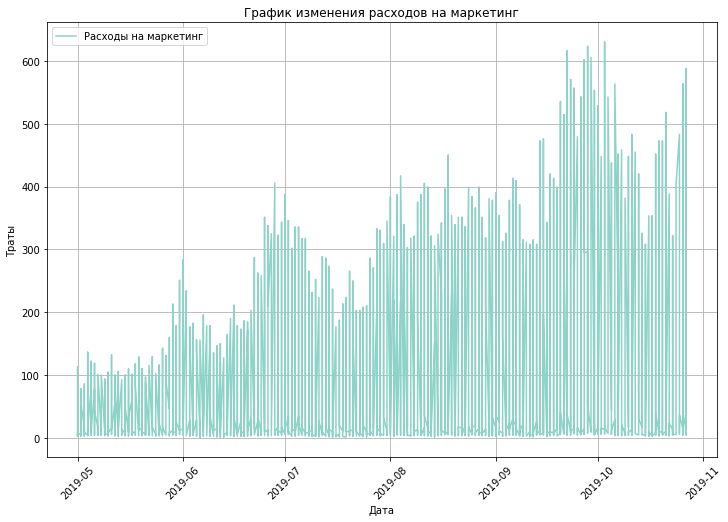

In [ ]:
costs.plot(y='costs', # столбец значений для вертикальной оси,
           x='dt',
           figsize=(12, 8), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Расходы на маркетинг', # название линии                       
           legend=True,# выводить ли легенду к графику
           colormap='Set3') 

plt.title('График изменения расходов на маркетинг')
plt.xlabel('Дата')
plt.ylabel('Траты')
plt.show()

Самые высокие траты на маркетинг приходятся на конец сентября начало октября.

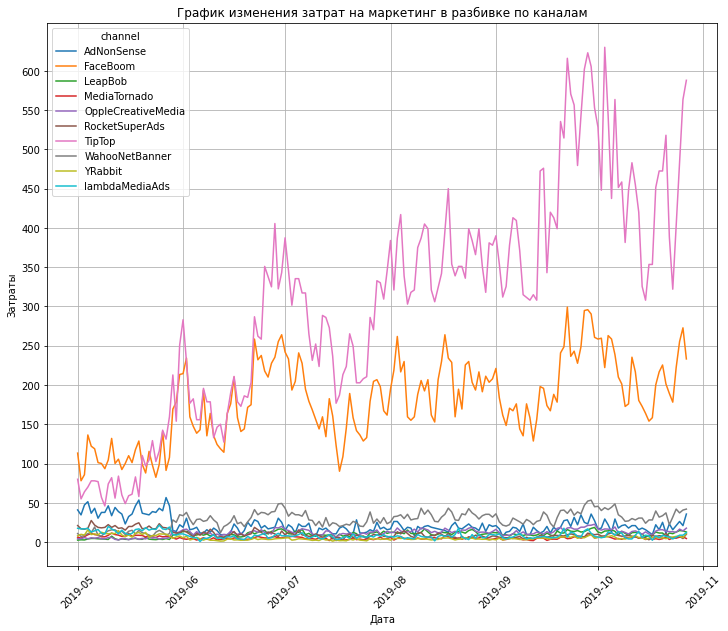

In [ ]:
# График изменения трат на маркетинг по времени и каналам
filtered_data = costs.pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )
filtered_data.plot(                                             
           figsize=(12, 10), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
           #colormap='ocean'
) 

plt.yticks(np.arange(0, 650, 50)) #зададим шаг по oy
plt.title('График изменения затрат на маркетинг в разбивке по каналам')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Больше всего потрачено на TipTop и к октябрю число трат приближалось к 650 у.е. Число трат на FaceBoom находится в районе 300. И если остальные источники не показывают какую-либо значительную динамику, то затраты на источник Tip-Top возрастают со временем. Остальные каналы привлечения обходятся довольно дешево. Возможно, стоит посмотреть на них в отдельном срезе, чтобы понять динамику, тк на этом графике данные по ним недостаточно показательны.  
Исключим каналы TipTop и FaceBoom и построим новый график.

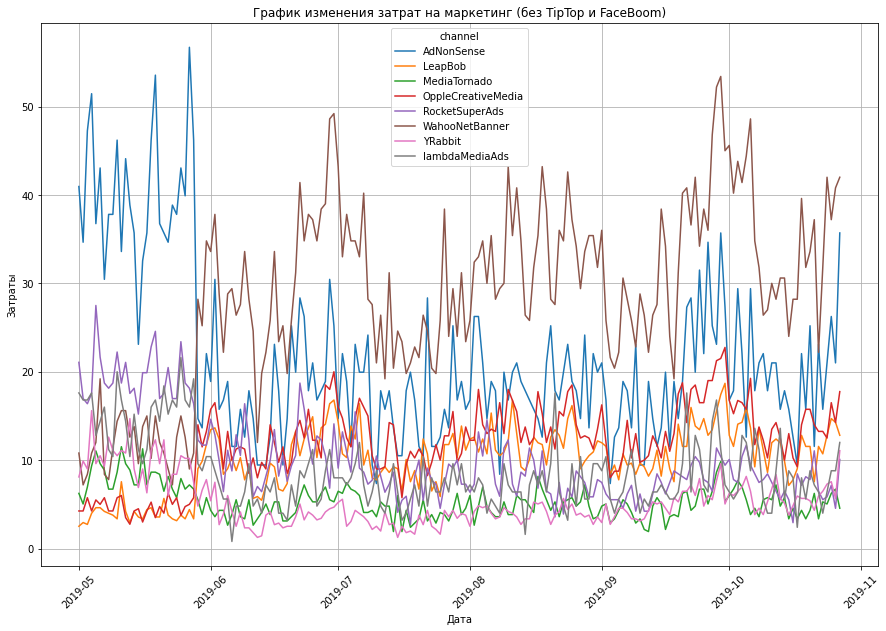

In [ ]:
filtered_data2 = costs[~costs['channel'].isin(['TipTop', 'FaceBoom'])].pivot_table(
        index='dt', columns='channel', values='costs', aggfunc='sum'
    )

filtered_data2.plot(                                             
           figsize=(15, 10), # размеры картинки: (x_size, y_size)
           grid=True, # отображать сетку или нет
           rot=45,        
           label='Каналы', # название линии                       
           legend=True,# выводить ли легенду к графику
           #colormap='ocean'
) 

plt.yticks(np.arange(0,  60, 10)) #зададим шаг по oy
plt.title('График изменения затрат на маркетинг (без TipTop и FaceBoom)')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

Среди рекламных источников помимо TipTop и FaceBoom с июня начали расти траты на WahooNetBanner (к октябрю их число было в районе 53 у.е.). Затраты на AdNonSense, наоборот, стали снижаться с июня 2019 года (с 55 до 35). По остальным источникам траты варьируются в пределах 3-20 у.е.

## 4.2 Узнаем, сколько в среднем стоило привлечение одного пользователя из каждого источника. Рассчитаем средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Используем профили пользователей.

In [ ]:
# Исключим пользователей по органическому трафику
profiles_payer = profiles.query('channel != "organic"')

In [ ]:
print('Средняя стоимость привлечения одного пользователя: {}'.format(round(profiles_payer['acquisition_cost'].mean(), 3)))

Средняя стоимость привлечения одного пользователя: 1.127


In [ ]:
CAC_mean_channel = profiles_payer.groupby('channel').agg({'acquisition_cost':['mean']})
CAC_mean_channel.columns = ['mean']
CAC_mean_channel.sort_values(by='mean', ascending=False).style.format({'mean': '{:.2f}'})

,mean
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


## 4.3 Вывод

Больше всего трат приходитя на источник TipTop (51.9%). Следом идет источник FaceBoom(30.75%). Далее идут низкозатратные источники WahooNetBanner (4.88%), AdNonSense (3.71%), OppleCreativeMedia (2.04%). На оставшиеся источники приходится 1-2% трат.

Визуализировано изменение метрик во времени. Заметны два "активных игрока" - это TipTop и FaceBoom. Больше всего трафика закупали у TipTop, и к октябрю число трат приближалось к 650 у.е. Число трат на FaceBoom находится в районе 300. Остальные каналы привлечения обходятся довольно дешево.

Среди рекламных источников помимо TipTop и FaceBoom с июня начали расти траты на WahooNetBanner (к октябрю их число было в районе 53 у.е.). Затраты на AdNonSense, наоборот, стали снижаться с июня 2019 года (с 55 до 35). По остальным источникам траты варьируются в пределах 3-20 у.е.

Выяснено, сколько в среднем стоило привлечение одного пользователя из каждого источника.

Рассчитан средний CAC на одного пользователя для всего проекта и для каждого источника трафика. Медианная стоимость привлечения одного пользователя - 0.24. При этом среднее находится на значении 0.7. Вероятно, в какие-то периоды мы тратили на пользователей больше, и в данных есть какие-то выбросы, которые влияют на разницу в стреднем и медианой. Максимальная стоимость привлечения пользователя - 3.71 у.е.

На разницу между медианой и средним оказывает влияние большое число нулевой стоимости пользователей. Вероятно, это органический трафик.

Самый дорогой трафик - TipTop (средняя стоимость - 2.80 за пользователя), далее идет FaceBoom и AdNonSense примерно в равной ценовой категории (1.11 и 1.01 соответственно). Органический трафик бесплатен, остальные каналы берут за пользователя от 0.21 до 0.72 у.е.

# 5. Оценим окупаемость рекламы

In [ ]:
# Зададим момент анализа и горизонт анализа
observation_date = datetime(2019, 11, 1).date() # момент анализа
horizon_days = 14                               # горизонт анализа

## 5.1 Проанализируем общую окупаемость рекламы. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

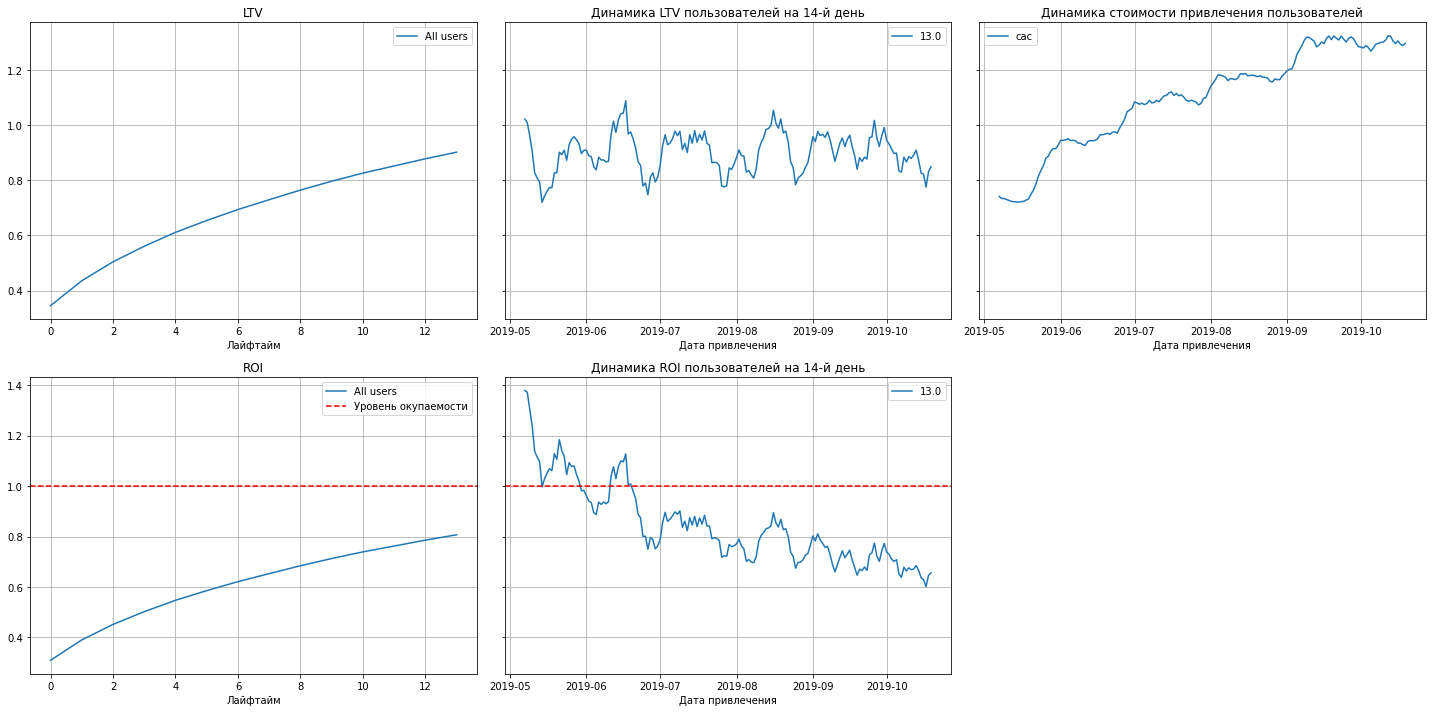

In [ ]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payer, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:

1. Реклама не окупается к концу 2й недели. ROI — около 80%.
2. CAC нестабилен. Рекламный бюджет увеличивается с течением времени.
3. На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
4. ROI пользователей неумолимо падает. До июля показатель был выше уровня окупаемости, но после стал падать до 0.6.




## 5.2 Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

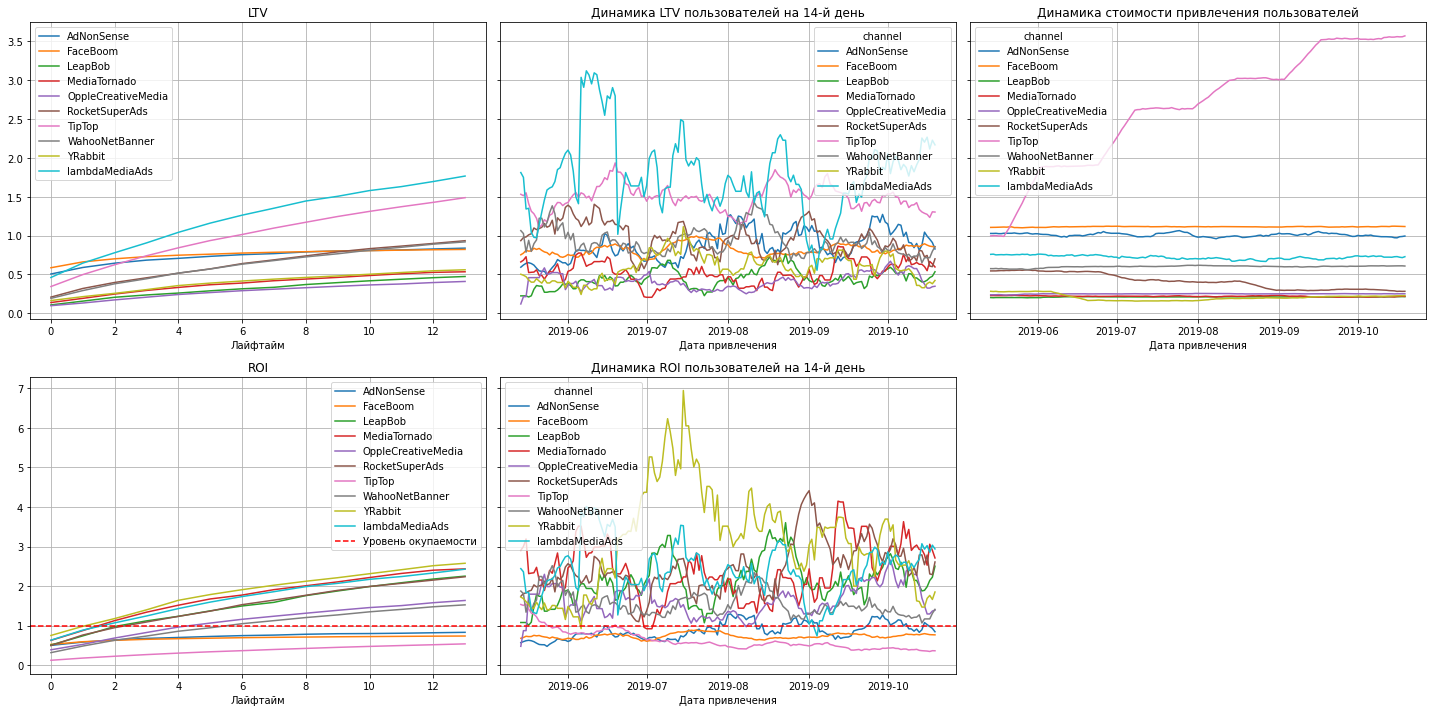

In [ ]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payer, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Видим большой рост стоимости привлечения пользователей из рекламного канала TipTop. Кажется, слишком много средств было потрачено на эту рекламную сеть, но результаты оставляют желать лучшего.
Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop.
Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.

## 5.3 Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

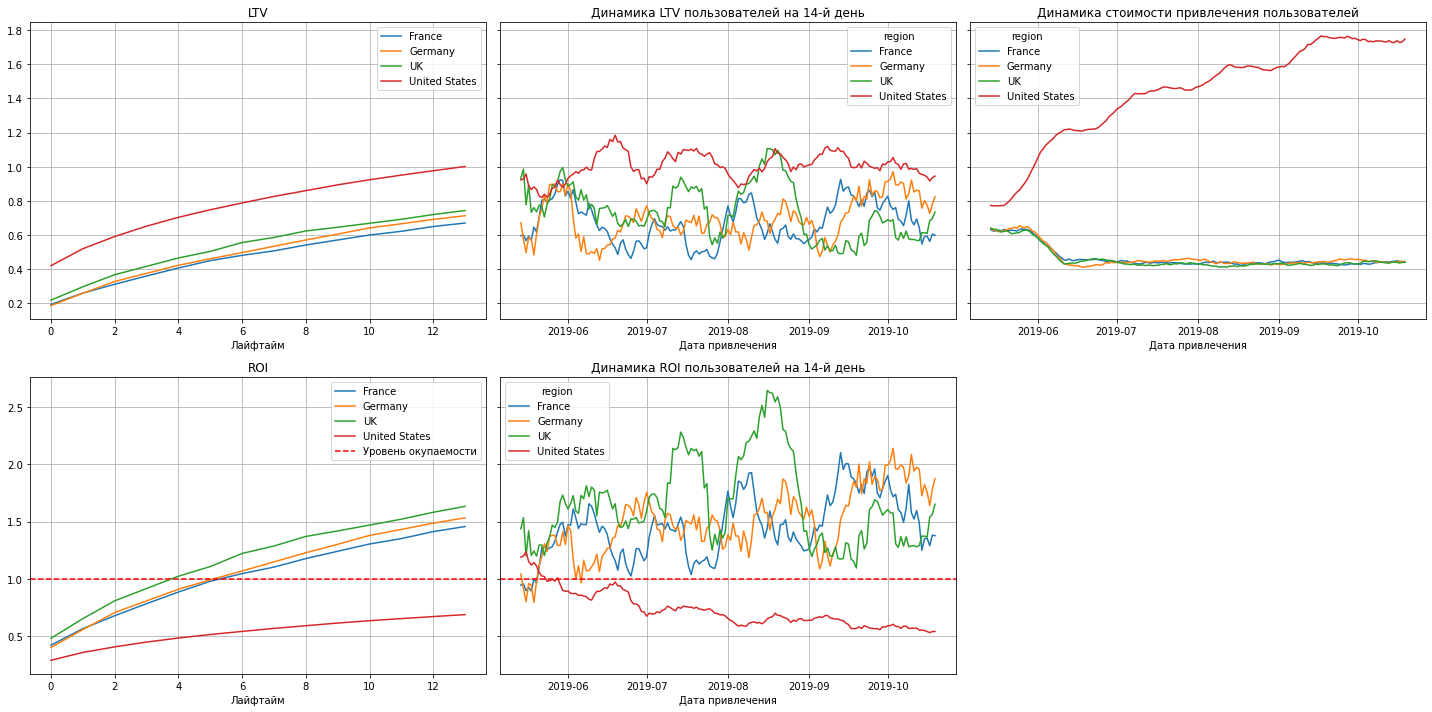

In [ ]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_payer, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 



Реклама окупается не везде. В США уровень окупаемости рекламы низкий, а, как мы помним, у нас основная аудитория - это пользователи из США. При этом стоимость привлечения пользователей из США - самая высокая. И она растет. LTV всё так же подвержен сезонности, но стабилен. Лучше всего окупается Англия и Германия. Явный аутсайдер - США. Причем окупаемость пользователей начала падать с конца июня 2019 года. Возможно, неудачный релиз, запуск похожего продукта у конкурентов или какие-то  изменения в продукте сыграли такую роль, и сервис стал менеее привлекательным для пользователей.


## 5.4 Построим и изучим графики конверсии и удержания с разбивкой по устройствам, странам, рекламным каналам.

Графики конверсии с разбивкой по ['device']



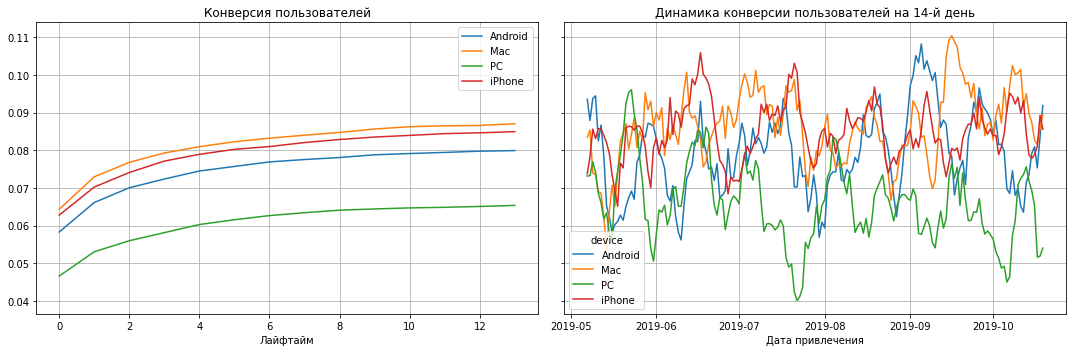


Графики удержания с разбивкой по ['device']



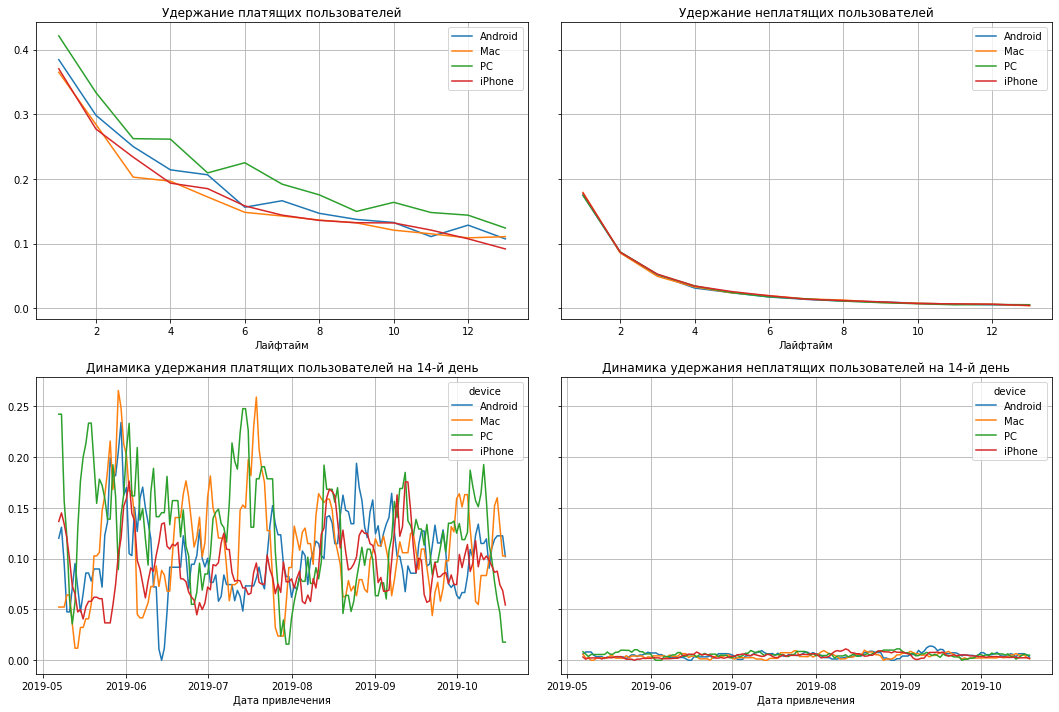


------------------------------------------------------------------------------------------------------------------------------------------
Графики конверсии с разбивкой по ['region']



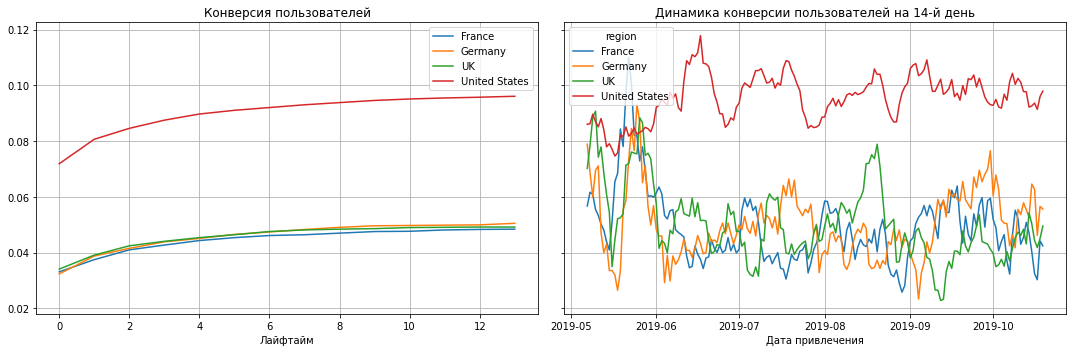


Графики удержания с разбивкой по ['region']



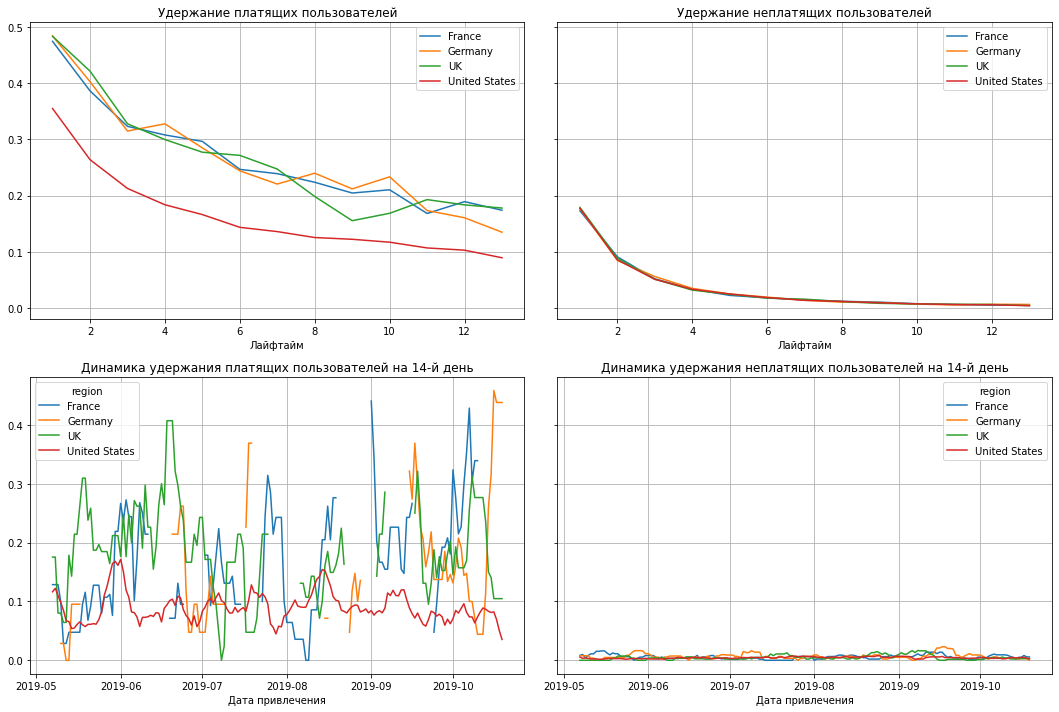


------------------------------------------------------------------------------------------------------------------------------------------
Графики конверсии с разбивкой по ['channel']



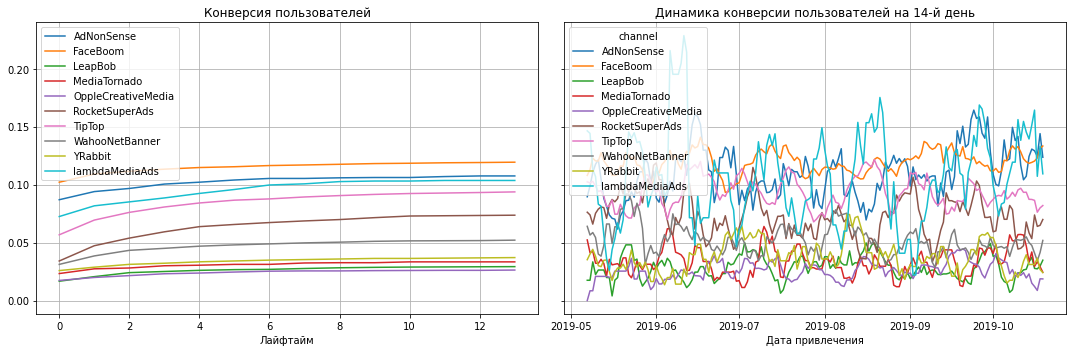


Графики удержания с разбивкой по ['channel']



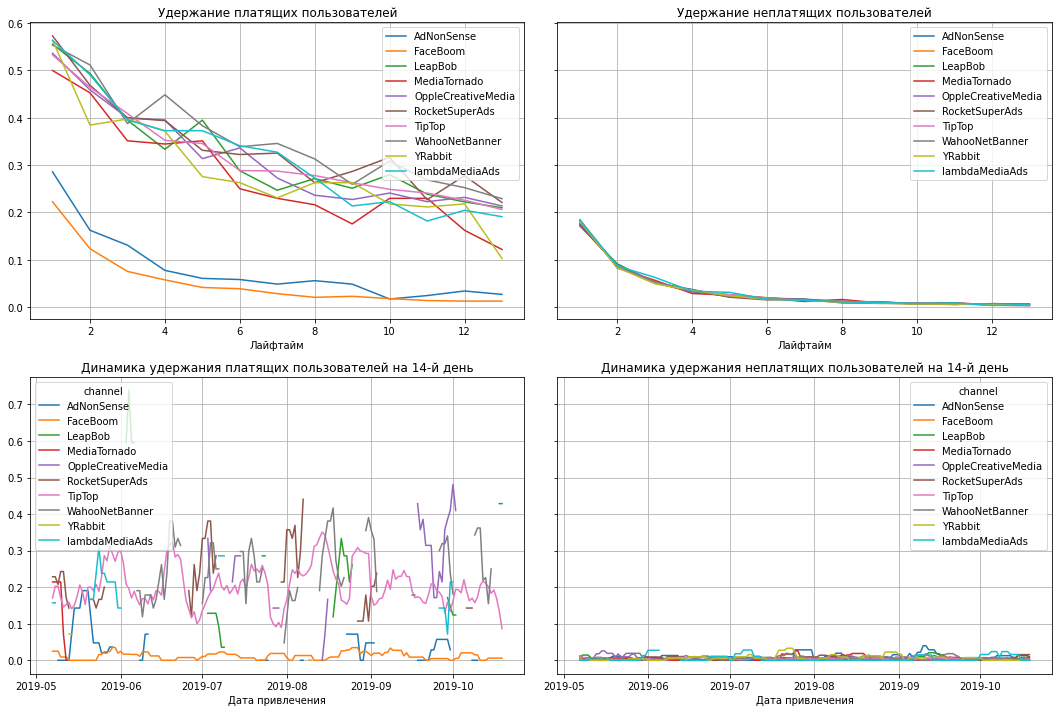


------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
dimension = [['device'], ['region'], ['channel']] # Создадим список с названиями столбцов датасета
# напишем цикл, который названия столбцов датасета из списка dimension передает в качестве аргумента 
# функциям get_conversion и get_retention
for dim in dimension:
  print(f'Графики конверсии с разбивкой по {dim}') # Выведем название серии графиков конверсии
  print()
  conversion_raw, conversion_grouped, conversion_history = get_conversion( # применим функцию get_conversion
      profiles_payer, orders, observation_date, horizon_days, dimensions=dim
  )
  plot_conversion(conversion_grouped, conversion_history, horizon_days)    # пострим графики конверсии функцией plot_conversion
  print()
  print(f'Графики удержания с разбивкой по {dim}')  # Выведем названия серии графиков удержания
  print()
  retention_raw, retention_grouped, retention_history = get_retention( # применим функцию get_retention
      profiles_payer, visits, observation_date, horizon_days, dimensions=dim
  )
  plot_retention(retention_grouped, retention_history, horizon_days) # пострим графики конверсии функцией plot_retention
  print()
  print('------------------------------------------------------------------------------------------------------------------------------------------')

Конверсия пользователей на  MAC и iPhone выше остальных.
Неплатящие пользователи удерживаются стабильно плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы iPhone и Mac.

Слабая конверсия у пользователей из Англии, Германии и Франции, но и их доля относительно всех пользователей не такая большая. Пользователи из США удерживаются плохо.

Плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit. Плохо удерживаются пользователи из каналов FaceBoom и AdNonSense.

## 5.5 Вывод

В целом, реклама близка к окупемости, если учитывать, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения и то, что в анализ включены органические пользователи (не будем исключать влияние SEO). Реклама почти окупается к концу 2й недели. ROI — примерно 80%
Окупаемость могут снижать владельцы Mac и iPhone, страна - США. Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop.
Проблемы окупаемости могут быть вызваны ненормированным распределением средств на рекламу (в какой-то источник вложено больше средств, чем в остальные, а он не оправдал надежд), также возможно, что горизонт анализа недостаточен для того, чтобы пользователи окупились.

## 6. Вывод


### 6.1. Выделим причины неэффективности привлечения пользователей.

Оценена окупаемость рекламы. Рассчитан и визуализирован LTV и ROI. По графикам сделаны следующие выводы:

Реклама не окупается к концу 2й недели. ROI — около 80%.
CAC нестабилен. Рекламный бюджет увеличивается с течением времени.
На LTV влияет сезонный фактор, но в целом, этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
ROI пользователей неумолимо падает. До июля показатель был выше уровня окупаемости, но после стал падать до 0.6.
Чтобы разобраться в причинах, мы прошлись по всем доступным характеристикам пользователей — стране, каналу и устройству первого посещения.

Разбивка по странам
Вот что говорят графики:

- В США уровень окупаемости рекламы низкий, основная аудитория - это пользователи из США.
- При этом стоимость привлечения пользователей из США - самая высокая.
- LTV всё так же подвержен сезонности, но стабилен.
- Лучше всего окупается Англия и Германия. Явный аутсайдер - США. Причем окупаемость пользователей начала падать с конца июня 2019 года. Возможно, неудачный релиз, запуск похожего продукта у конкурентов или какие-то  изменения в продукте сыграли такую роль, и сервис стал менеее привлекательным для пользователей.
Значит, надо направить внимание на пользователей из США.

Слабая конверсия у пользователей из Англии, Германии и Франции. Но и их доля относительно всех пользователей не такая большая.

Видно также, что пользователи из США явно плохо удерживаются.

Разбивка по каналам
Видим большой рост стоимости привлечения пользователей из рекламного канала TipTop. Кажется, слишком много средств было потрачено на эту рекламную сеть, но ожидания не оправдались. Не окупаются пользователи, привлеченные из каналов LeapBop, FaceBoom, TipTop. Хорошо показала себя рекламная сеть YRabbit в июле - ROI пользователей на 14 день был высок.

Плохо конвертируются пользователи из каналов RocketSuperAds, MediaTornado, YRabbit.

Видим явных аутсайдеров - плохо удерживаются пользователи из каналов FaceBoom и AdNonSense.

## 6.2. Сформулируем рекомендации для отдела маркетинга.

Направить внимание по окупаемости следует на владельцев Mac и iPhone - стоимость их привлечения высока (и растет от месяца к месяцу), а окупаемоcть страдает. Возможно, стоит сделать какое-то маркетинговое предложение именно для владельцев устройств на базе этих ОС, чтобы они приносили продукту бОльшую денежную ценность.

Для пользователей из США в целом уровень окупаемости рекламы низкий, основная аудитория - это пользователи из США. При этом стоимость привлечения пользователей из США - самая высокая. Поэтому стоит также направить силы на балансировку затрат на рекламу по странам.

Лучше всего окупается Англия и Германия. Возможно, стоит попробовать закупить больше трафика, целясь на эту аудиторию. Явный аутсайдер по окупаемости - США. Причем окупаемость пользователей начала падать с конца июня 2019 года - стоит также разобраться, что могло послужить причиной.

Виден большой рост стоимости привлечения пользователей из рекламного канала TipTop. Кажется, слишком много средств было потрачено на эту рекламную сеть, но выхлопа от нее получилось не так много, как ожидалось. Возможно, стоит уменьшить бюджет, выделяемый на эту сеть и перенаправить его на более эффективный канал.

Не окупаются пользватели, привлеченные из каналов LeapBop, FaceBoom, TipTop. Больше всего трафика закупали у TipTop, и к октябрю число трат приближалось к 650 у.е. Число трат на FaceBoom находится в районе 300. Остальные каналы привлечения обходятся довольно дешево. Плохо удерживаются пользователи из каналов FaceBoom и AdNonSense. Можно попробовать переключить внимание на более дешевые, но прибыльные каналы.

Социальные сети сейчас очень динамично развиваются и являются мощным источником привлечения новых пользователей, имеют большой охват и относительно невысокую стоимость.